In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import numpy as np

# para graficos
import seaborn as sns
import matplotlib.pyplot as plt

# para modelagem
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ###########
sns.set()
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
plt.style.use("classic")
# plt.rcParams["figure.figsize"] = [10, 5]


In [32]:
pip install category-encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/content/drive/MyDrive/CreditoAlemão.csv", index_col = 0)

In [4]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df.iloc[0:4, 0:7]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount
0,67,male,2,own,NaN,little,1169
1,22,female,2,own,little,moderate,5951
2,49,male,1,own,little,NaN,2096
3,45,male,2,free,little,little,7882


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


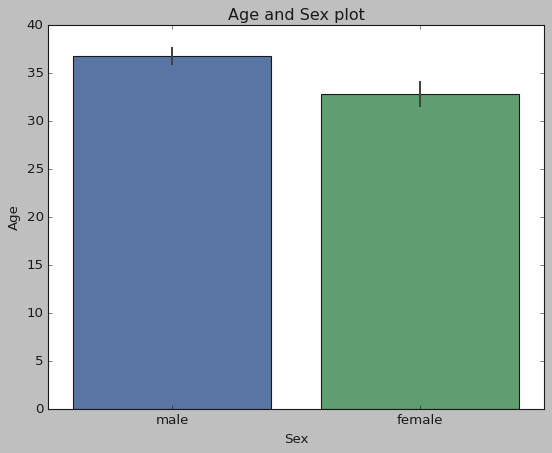

In [8]:

_ = sns.barplot(x='Sex', y='Age', data=df).set(title="Age and Sex plot")

In [9]:
df.isna()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().mean()

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [11]:
df.Housing.value_counts(normalize=True).sort_index()

free    0.108
own     0.713
rent    0.179
Name: Housing, dtype: float64

In [12]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [13]:
df.query('Age > 70')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
186,74,female,3,free,little,moderate,5129,9,car,bad
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
536,75,female,3,own,NaN,little,1374,6,car,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [14]:
homens_idosos = df.query('Age > 70 & Sex == "male"')
homens_idosos.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [15]:
provavel_categorica = {}
for var in df.columns:
  provavel_categorica[var] = 1.0 * df[var].nunique()/df[var].count() < 0.03

provavel_categorica

{'Age': False,
 'Sex': True,
 'Job': True,
 'Housing': True,
 'Saving accounts': True,
 'Checking account': True,
 'Credit amount': False,
 'Duration': False,
 'Purpose': True,
 'Risk': True}

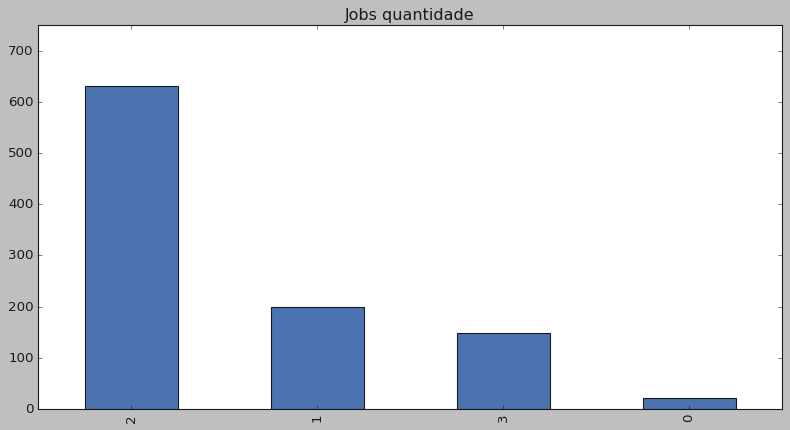

In [16]:
_ = plt.figure(figsize=(12, 6))
_ = df.Job.value_counts().plot(kind='bar')
_ = plt.title('Jobs quantidade')
_ = plt.ylim(0, 750)

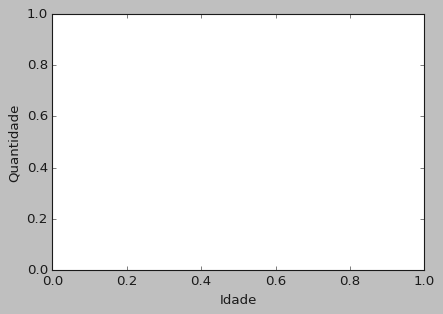

In [17]:
#No matplot voce meio que vai construindo seu proprio grafico do 0

_ = plt.figure(figsize=(6, 4))
_ = plt.xlabel('Idade')
_ = plt.ylabel('Quantidade')

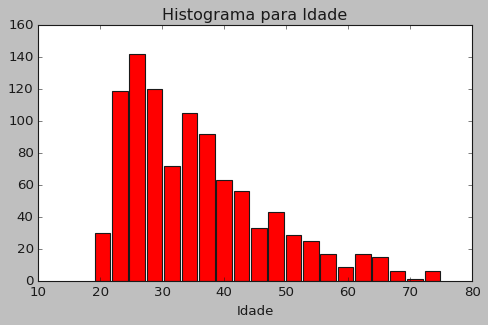

In [18]:
_ = plt.figure(figsize=(7, 4))
_ = plt.hist(data=df, x="Age", bins=20, rwidth=0.9, color='red')
_ = plt.title('Histograma para Idade')
_ = plt.xlabel("Idade")

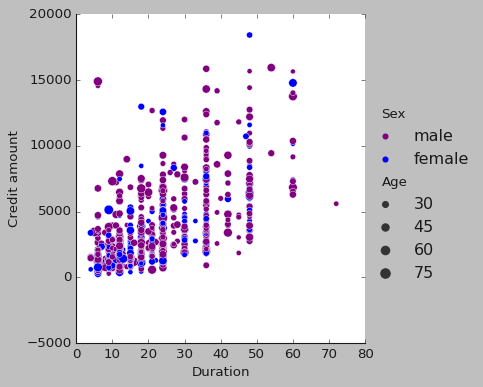

In [19]:
_ = sns.relplot(x='Duration', y='Credit amount', size='Age', hue='Sex', palette=['purple','blue'], data=df)

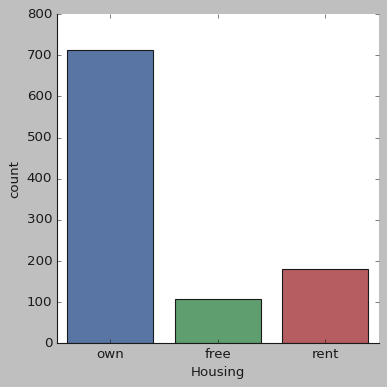

In [20]:
_ = sns.catplot(x='Housing', kind='count', data=df)

In [21]:
df["Target"] = np.where(df["Risk"] == "bad", 1, 0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [22]:
df.drop("Risk", axis=1, inplace=True)


In [23]:
df.Target.value_counts(normalize=True)


0    0.7
1    0.3
Name: Target, dtype: float64

# Machine Learning

In [24]:
features = ["Age", "Job", "Credit amount", "Purpose", "Housing", "Duration"]

target = "Target"

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Dividir em treino e teste antes de qualquer pré-processamento
X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)


### SEMPRE antes de QUALRQUER pré-processamento voce precisa dividir em treino e teste.

Agora vamos tratar variável categórica

In [27]:
cat_features = ["Job", "Housing", "Purpose"]
num_features = ["Age", "Credit amount", "Duration"]

In [35]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [39]:
X_train.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
763,30,1,0,0,0,12680,1,0,0,0,0,0,0,0,1,0,0,21
534,25,0,1,0,0,3105,0,1,0,0,0,0,0,0,0,1,0,24
86,27,0,1,0,0,1295,0,0,1,0,0,0,0,0,0,1,0,18
927,39,0,1,0,0,10297,1,0,0,0,0,0,0,0,1,0,0,48
134,21,0,1,0,0,10144,0,1,0,0,0,0,0,0,0,1,0,60


In [40]:
X_test.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
842,23,0,1,0,0,1943,0,0,0,0,1,0,0,0,0,1,0,18
68,37,0,1,0,0,1819,0,0,0,0,0,0,0,1,1,0,0,36
308,24,0,1,0,0,1237,0,0,1,0,0,0,0,0,0,1,0,8
881,48,0,1,0,0,9277,1,0,0,0,0,0,0,0,1,0,0,24
350,23,0,1,0,0,1236,0,0,0,0,0,0,1,0,0,0,1,9


Nesse caso, usaremos o Random Forest Classifier e não o Random Forest Regressor. Porque o objetivo é que o modelo responda "sim" ou "não" no final. Se o objetivo fosse prever a renda usaríamos o Random Forest Regressor

In [41]:
clf_RF = RandomForestClassifier()
clf_RF.fit (X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = clf_RF.predict(X_test)

y_pred
# Veremos qual cliente é bom ou mal pagador.

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)

Acurácia: 0.6533333333333333
F1 Score: 0.28767123287671237


In [45]:
from sklearn.metrics import confusion_matrix


In [46]:
print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred)))


Matriz de Confusão : 
[[175  24]
 [ 80  21]]


In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive: " + str(tp))
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))


True Positive: 21
True Negative: 175
False Positive: 24
False Negative: 80


In [49]:
# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

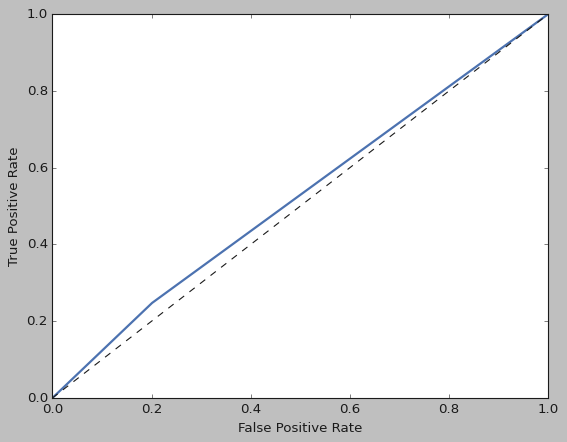

In [50]:
plot_roc_curve(fpr, tpr)


In [51]:
clf_RF.feature_importances_


array([0.23692851, 0.01879868, 0.02260116, 0.02002972, 0.00579551,
       0.31116593, 0.02872072, 0.02150047, 0.02020004, 0.01638427,
       0.01199413, 0.00377255, 0.00660205, 0.01522379, 0.01712723,
       0.02212764, 0.01636866, 0.20465894])

Vendo a relevancia de cada feature no modelo

In [52]:
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp


Credit amount    0.311166
Age              0.236929
Duration         0.204659
Purpose_1        0.028721
Job_2            0.022601
Housing_2        0.022128
Purpose_2        0.021500
Purpose_3        0.020200
Job_3            0.020030
Job_1            0.018799
Housing_1        0.017127
Purpose_4        0.016384
Housing_3        0.016369
Purpose_8        0.015224
Purpose_5        0.011994
Purpose_7        0.006602
Job_4            0.005796
Purpose_6        0.003773
dtype: float64

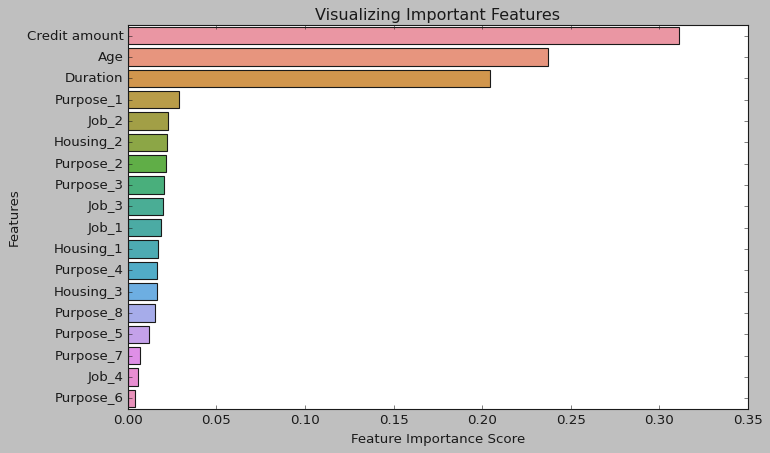

In [53]:
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")
